In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer
from keras.models import Sequential
from keras.models import Model
from keras.constraints import maxnorm
from keras.layers import Input
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.callbacks import TensorBoard

In [40]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 9)})
plt.style.use('ggplot')

%matplotlib inline

In [27]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
X_train = mnist.train.images
y_train = mnist.train.labels 
X_test = mnist.test.images
y_test = mnist.test.labels 
X_val = mnist.validation.images
y_val = mnist.validation.labels

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28).astype('float32')

In [46]:
epochs = 12
# layers = [784, 256, 128]
learning_rate = 0.001
decay_rate = learning_rate / epochs
learning_rate, decay_rate

(0.001, 8.333333333333333e-05)

In [47]:
y_train.shape

(550000, 10)

In [48]:
# input_dim = X_train.shape[1]
# output_dim = y_train.shape[1]
num_classes = 10
# print(X_train.shape, X_val.shape, X_test.shape)
# print(input_dim, output_dim)
n_samples, input_dim, img_rows, img_cols = X_train.shape
n_samples, input_dim, img_rows, img_cols

(55000, 28, 28, 1)

In [49]:
input_shape = (img_rows, img_cols, 1)
print(input_shape)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

(28, 1, 1)


ValueError: cannot reshape array of size 43120000 into shape (55000,28,1,1)

In [50]:
# input layer
# inputs = Input(shape=(input_dim,), dtype='float32', name='main_input')
# with_dropout = False

# hidden layers
# x = Dense(256, activation='relu')(inputs)
# # x = Dropout(0.1)(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(56, activation='relu')(x)
# # x = Dense(28, activation='relu')(x)

# img_rows, img_cols = 28, 28


# input_shape = (1, img_rows, img_cols)
# num_pixels = X_train.shape[1] * X_train.shape[2]
# print(num_pixels)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# output layer
# predictions = Dense(output_dim, activation='softmax', name='main_output')(x)
# model.add(Dense(output_dim, activation='softmax', name='main_output'))
# opt = Adam(lr=learning_rate) #, decay=decay_rate)
# momentum = 0.8
# opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)
# model = Model(inputs=inputs, outputs=predictions)


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_17/convolution' (op: 'Conv2D') with input shapes: [?,28,1,1], [3,3,1,32].

In [12]:
hist_model = model.fit(X_train, y_train, epochs=epochs, batch_size=200, verbose=2, 
                       validation_data=(X_val, y_val)
                      )

ValueError: Error when checking target: expected dense_1 to have 4 dimensions, but got array with shape (55000, 10)

In [91]:
# Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy = {:.4f}".format(accuracy))
print("Loss = {:.4f}".format(loss))


Accuracy = 0.9811
Loss = 0.1175


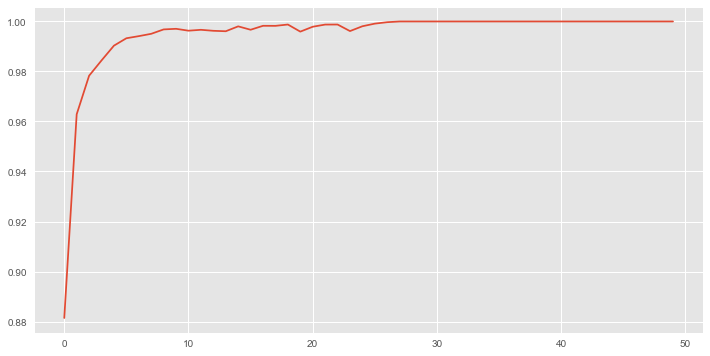

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(hist_model.history['acc']);